In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


### load data direct from github

In [2]:
# load hourly data
hourly_data = pd.read_csv('hour.csv')

In [3]:
# print some generic statistics about the data
print(f"Shape of data: {hourly_data.shape}")
print(f"Number of missing values in the data:\
{hourly_data.isnull().sum().sum()}")


Shape of data: (17379, 17)
Number of missing values in the data:0


In [4]:
hourly_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
hourly_data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


According to the description of the original data, provided in the Readme.txt file, we can split the columns into three main groups:

temporal features: This contains information about the time at which the record was registered. This group contains the dteday, season, yr, mnth, hr, holiday, weekday, and workingday columns.
weather related features: This contains information about the weather conditions. The weathersit, temp, atemp, hum, and windspeed columns are included in this group.
record related features: This contains information about the number of records for the specific hour and date. This group includes the casual, registered, and cnt columns

In [6]:
# create a copy of the original data This is done as we do not want a specific transformation to affect our initial data
preprocessed_data = hourly_data.copy()


In the next step, map the season variable from a numerical to a nicely encoded categorical one. In order to do that, we create a Python dictionary, which contains the encoding, and then exploit the apply and lambda functions:

In [7]:
# transform seasons
seasons_mapping = {1: 'winter', 
                   2: 'spring',
                   3: 'summer', 
                   4: 'fall'}
preprocessed_data['season'] = preprocessed_data['season'].apply(lambda x: seasons_mapping[x])

In [8]:
preprocessed_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,winter,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,winter,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,winter,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,winter,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Create a Python dictionary for the yr column as well

In [9]:
# transform yr
yr_mapping = {0: 2011, 1: 2012}
preprocessed_data['yr'] = preprocessed_data['yr'].apply(lambda x: yr_mapping[x])

In [10]:
preprocessed_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,winter,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,winter,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,winter,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,winter,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Create a Python dictionary for the weekday column

In [11]:
# transform weekday
weekday_mapping = {0:'Sunday',1:'Monday', 2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'} 
preprocessed_data['weekday'] = preprocessed_data['weekday'].apply(lambda x: weekday_mapping[x])

In [12]:
preprocessed_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,winter,2011,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,winter,2011,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,winter,2011,1,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,winter,2011,1,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


Let's now proceed with encoding the weather-related columns (weathersit, hum, and windspeed). According to the information provided by the data, the weathersit column represents the current weather conditions, where 1 stands for clear weather with a few clouds, 2 represents cloudy weather, 3 relates to light snow or rain, and 4 stands for heavy snow or rain. The hum column stands for the current normalized air humidity, with values from 0 to 1 (hence, we will multiply the values of this column by 100, in order to obtain percentages). Finally, the windspeed column represents the windspeed, which is again normalized to values between 0 and 67 m/s

### Encode the weathersit values 

In [13]:
# transform weathersit
weather_mapping = {1: 'clear', 2:'cloudy',3:'light_rain_snow',4:'heavy_rain_snow'}
preprocessed_data['weathersit'] = preprocessed_data['weathersit'].apply(lambda x: weather_mapping[x])

In [14]:
preprocessed_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,0,0,Saturday,0,clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,winter,2011,1,1,0,Saturday,0,clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,winter,2011,1,2,0,Saturday,0,clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,winter,2011,1,3,0,Saturday,0,clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,winter,2011,1,4,0,Saturday,0,clear,0.24,0.2879,0.75,0.0,0,1,1


## Finally, rescale the hum and windspeed columns:


In [15]:
# transform hum and windspeed
preprocessed_data['hum'] = preprocessed_data['hum']*100
preprocessed_data['windspeed'] = preprocessed_data['windspeed']*67
preprocessed_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,0,0,Saturday,0,clear,0.24,0.2879,81.0,0.0,3,13,16
1,2,2011-01-01,winter,2011,1,1,0,Saturday,0,clear,0.22,0.2727,80.0,0.0,8,32,40
2,3,2011-01-01,winter,2011,1,2,0,Saturday,0,clear,0.22,0.2727,80.0,0.0,5,27,32
3,4,2011-01-01,winter,2011,1,3,0,Saturday,0,clear,0.24,0.2879,75.0,0.0,3,10,13
4,5,2011-01-01,winter,2011,1,4,0,Saturday,0,clear,0.24,0.2879,75.0,0.0,0,1,1


#### We can visualize the results from our transformation by calling the sample() method on the newly created dataset:


In [16]:
# visualize preprocessed columns
cols = ['season', 'yr', 'weekday', 'weathersit', 'hum', 'windspeed']
preprocessed_data[cols].sample(10, random_state=123)

,season,yr,weekday,weathersit,hum,windspeed
5792,summer,2011,Saturday,clear,74.0,8.9981
7823,fall,2011,Sunday,clear,43.0,31.0009
15426,fall,2012,Tuesday,cloudy,77.0,6.0032
15028,fall,2012,Sunday,clear,51.0,22.0028
12290,spring,2012,Friday,cloudy,89.0,12.9980
3262,spring,2011,Friday,clear,64.0,7.0015
10763,spring,2012,Thursday,clear,42.0,23.9994
12384,spring,2012,Tuesday,light_rain_snow,82.0,11.0014
6051,summer,2011,Wednesday,clear,52.0,19.0012
948,winter,2011,Saturday,clear,80.0,0.0000


### Registered versus Casual Use Analysis


We begin our analysis of the single features by focusing on the two main ones: the number of rides performed by registered users versus the number of rides performed by non-registered (or casual) ones. These numbers are represented in the registered and casual columns, respectively, with the cnt column representing the sum of the registered and casual rides. We can easily verify the last statement for each entry in the dataset by using the assert statement:

In [17]:
"""
assert that total number of rides is equal to the sum of registered and casual ones
"""
assert (preprocessed_data.casual + preprocessed_data.registered == preprocessed_data.cnt).all(), 'Sum of casual and registered rides not equal to total number of rides'

The first step in analyzing the two columns is to look at their distributions. A useful Python package that we will use extensively in this book is seaborn. It is a data visualization library built on top of the standard matplotlib package, which provides a high-level interface for various statistical plots. In this way, the plots we present later will be both nicer and easier to produce. Let's start by visualizing the distribution of the registered and casual rides:

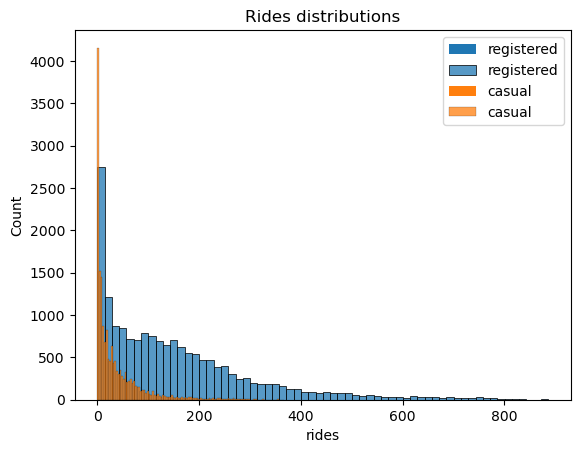

In [18]:
# plot distributions of registered vs casual rides
sns.histplot(preprocessed_data['registered'], label='registered')
sns.histplot(preprocessed_data['casual'], label='casual')
plt.legend()
plt.xlabel('rides')
plt.title("Rides distributions")
plt.savefig('rides_distributions.png', format='png')

we can easily see that registered users perform way more rides than casual ones. Furthermore, we can see that the two distributions are skewed to the right, meaning that, for most of the entries in the data, zero or a small number of rides were registered (think, for example, of overnight rides). Finally, every entry in the data has quite a large number of rides (that is, higher than 800).

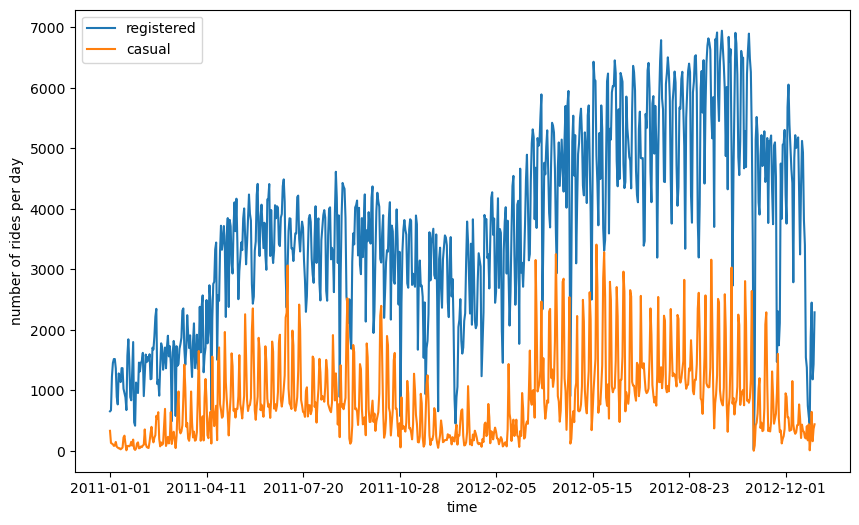

In [19]:
# plot evolution of rides over time
plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
ax = plot_data.groupby('dteday').sum().plot(figsize=(10,6))
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");
plt.savefig('rides_daily.png', format='png')

## Analysis of weather-related Features 

* temp: This is the normalized temperature in Celsius. Values are divided by 41, which means that the highest registered temperature in the data is 41°C (corresponding to 1 in our dataset).
* atemp: The normalized feeling temperature in Celsius. Values are divided by 50, which means that the highest registered temperature in the data is 50°C (corresponding to 1 in our dataset).
* hum: The humidity level as a percentage.
* windspeed: The wind speed in m/s.

et's now focus on an analysis of the group of features representing the weather conditions. Our expectation is to observe a strong dependency of those features on the current number of rides, as bad weather can significantly influence bike sharing services.

In [20]:
def plot_correlations(data, col):
    # get correlation between col and registered rides
    corr_r = np.corrcoef(data[col], data["registered"])[0,1]
    ax =sns.regplot(x=col, y='registered', data=data,scatter_kws={'alpha':0.05},label=f'Registered rides(correlation:{corr_r:.3f})')
    # get correlation between col and casual rides
    corr_c = np.corrcoef(data[col], data["casual"])[0,1]
    ax = sns.regplot(x=col, y='casual',data=data,scatter_kws={'alpha':0.05},label=f'Casual rides (correlation:{corr_c:.3f})')
    #adjust legend alpha
    legend = ax.legend()
    for lh in legend.legendHandles:
        lh.set_alpha(0.5)
    ax.set_ylabel("rides")
    ax.set_title(f"Correlation between rides and {col}")
    return ax

Applying the previously defined function to the four columns (temp, atemp, hum, and windspeed) returns the following figure:



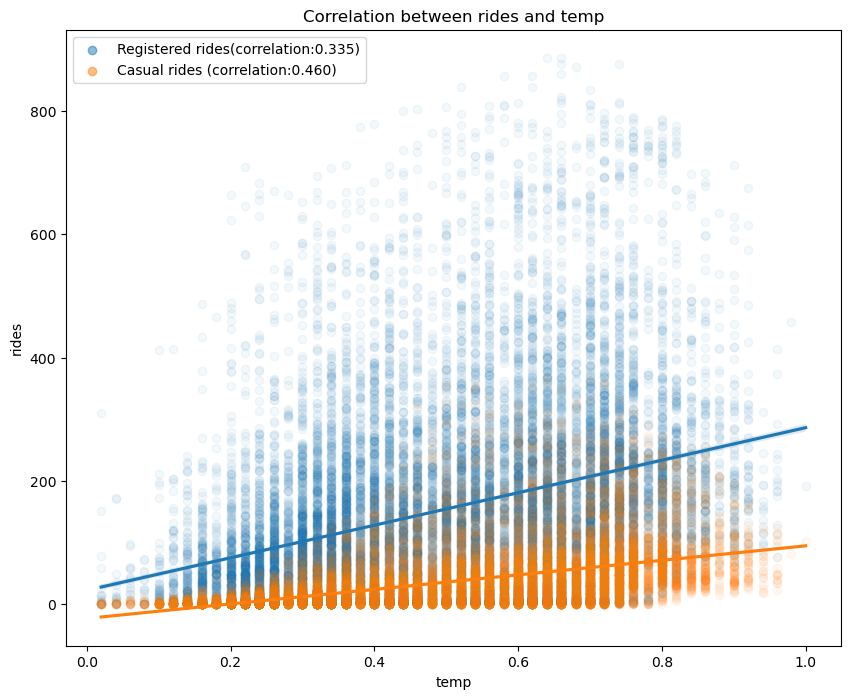

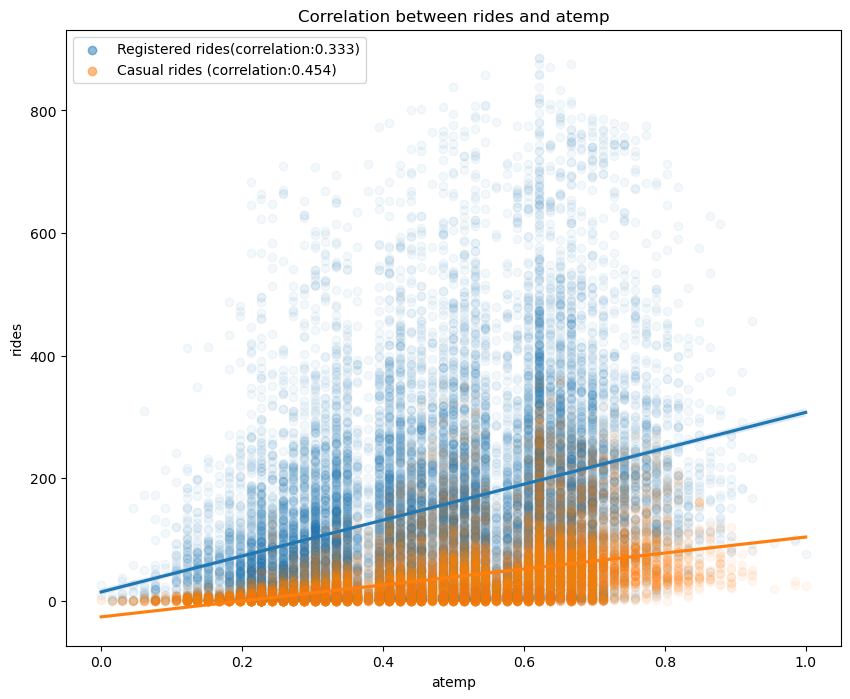

In [21]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'temp')
plt.savefig('correlation_temp.png', format='png')
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'atemp')
plt.savefig('correlation_atemp.png', format='png')

Now plot the correlation between the rides and hum, windspeed features separately:



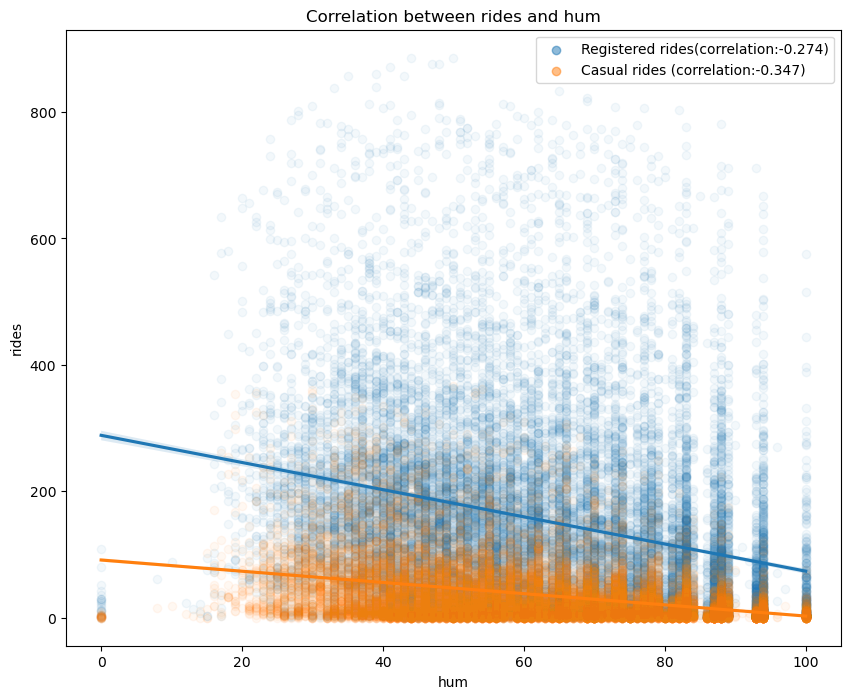

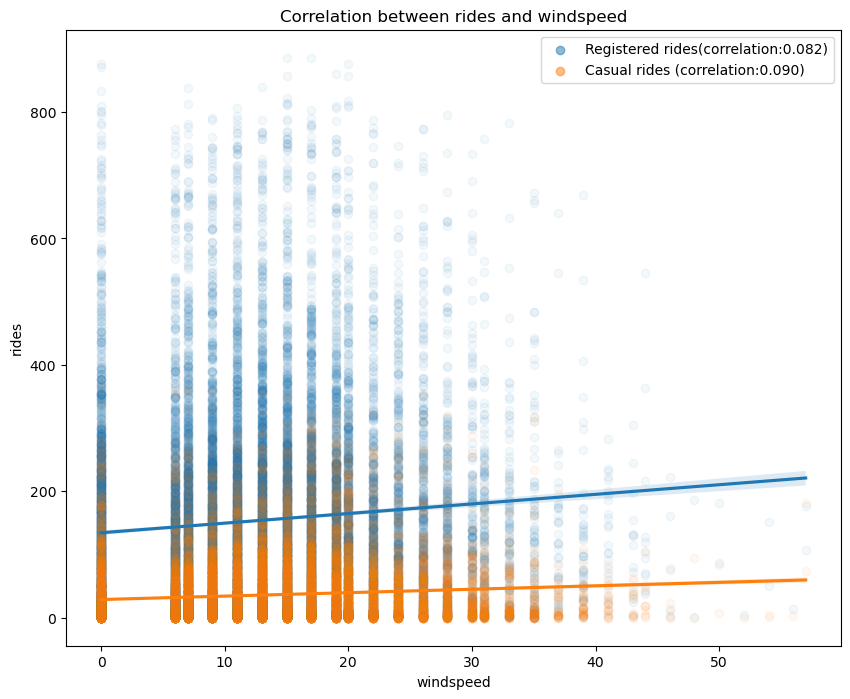

In [22]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'hum')
plt.savefig('correlation_hum.png', format='png')
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'windspeed')
plt.savefig('correlation_windspeed.png', format='png')